# WeatherPy

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress

os.chdir("../")   # change directory to import a shared output directory and API Key 

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
from pprint import pprint

# Output File (CSV)
output_data_file = "Resources/output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
lat_lngs = []
cities = []

baseURL = "https://api.openweathermap.org/data/2.5/weather?"  # base URL for weatherAPI
units = 'imperial'       # Units for displaying weather in fahrenheit

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

citiesToProcess = pd.DataFrame (cities, columns = ['City'])

#setup the remaining columns 
citiesToProcess["Lat"]="" 
citiesToProcess["Lng"]="" 
citiesToProcess["Max Temp"]="" 
citiesToProcess["Humidity"]="" 
citiesToProcess["Cloudiness"]="" 
citiesToProcess["Wind Speed"]="" 
citiesToProcess["Country"]="" 
citiesToProcess["Date"]="" 
citiesToProcess.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,road town,,,,,,,,
1,tasiilaq,,,,,,,,
2,verkhoturye,,,,,,,,
3,pevek,,,,,,,,
4,bluff,,,,,,,,


In [3]:
len(cities) # the length of expected items

596

In [4]:
citiesToProcess.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,road town,,,,,,,,
1,tasiilaq,,,,,,,,
2,verkhoturye,,,,,,,,
3,pevek,,,,,,,,
4,bluff,,,,,,,,


### Perform API Calls
Process cities that are betwen latitude and longitude range

In [5]:
 # setup parameters for passing to API to generate URL based on respective city passed into URL
baseURL = "https://api.openweathermap.org/data/2.5/weather?"
units="imperial"

parameters = {
      "units":units,
     "appid":weather_api_key,
}
group = 1
recordCount = 1

print (f"Beginning Data Retrieval ")
print (f"------------------------ ")
for index, row in citiesToProcess.iterrows():
    #print(index)
    if recordCount <= 50 :
        parameters['q'] = citiesToProcess.loc[index,'City']
    
        print (f"Processing Record {recordCount} of Set  {group} | {citiesToProcess.loc[index,'City']} ")
        getCityData = requests.get(baseURL,params=parameters).json()

        try:
            #grab infomration from results key 
            citiesToProcess.loc[index,'City']=getCityData['name']
            citiesToProcess.loc[index,'Lat']=getCityData['coord']['lat']
            citiesToProcess.loc[index,'Lng']=getCityData['coord']['lon']
            citiesToProcess.loc[index,'Max Temp']=getCityData['main']['temp_max']
            citiesToProcess.loc[index,'Humidity']=getCityData['main']['humidity']
            citiesToProcess.loc[index,'Cloudiness']=getCityData['clouds']['all']
            citiesToProcess.loc[index,'Wind Speed']=getCityData['wind']['speed']
            citiesToProcess.loc[index,'Country']=getCityData['sys']['country']
            citiesToProcess.loc[index,'Date']=getCityData['dt']
            
            recordCount +=1   # control count for the conditional 
            time.sleep(2)   # pause between number of records processed

        except (KeyError,IndexError):
            print("City not found. Skipping...")
    else:
        recordCount  = 1
        group += 1
        
            

    #Processing Record 1 of Set 1 | butaritari
    
print (f"------------------------ ")
print (f"Data Retrieval Complete ")
print (f"------------------------ ")
    


Beginning Data Retrieval 
------------------------ 
Processing Record 1 of Set  1 | road town 
Processing Record 2 of Set  1 | tasiilaq 
Processing Record 3 of Set  1 | verkhoturye 
Processing Record 4 of Set  1 | pevek 
Processing Record 5 of Set  1 | bluff 
Processing Record 6 of Set  1 | wulanhaote 
City not found. Skipping...
Processing Record 6 of Set  1 | saint-philippe 
Processing Record 7 of Set  1 | kodiak 
Processing Record 8 of Set  1 | jamestown 
Processing Record 9 of Set  1 | soyo 
Processing Record 10 of Set  1 | taolanaro 
City not found. Skipping...
Processing Record 10 of Set  1 | albany 
Processing Record 11 of Set  1 | illoqqortoormiut 
City not found. Skipping...
Processing Record 11 of Set  1 | atuona 
Processing Record 12 of Set  1 | yakima 
Processing Record 13 of Set  1 | arraial do cabo 
Processing Record 14 of Set  1 | bredasdorp 
Processing Record 15 of Set  1 | cape town 
Processing Record 16 of Set  1 | geraldton 
Processing Record 17 of Set  1 | ca mau 
P

Processing Record 11 of Set  4 | wuda 
Processing Record 12 of Set  4 | torbay 
Processing Record 13 of Set  4 | margate 
Processing Record 14 of Set  4 | sorvag 
City not found. Skipping...
Processing Record 14 of Set  4 | bengkulu 
Processing Record 15 of Set  4 | mount gambier 
Processing Record 16 of Set  4 | severo-kurilsk 
Processing Record 17 of Set  4 | noyon 
Processing Record 18 of Set  4 | norman wells 
Processing Record 19 of Set  4 | beidao 
Processing Record 20 of Set  4 | makinsk 
Processing Record 21 of Set  4 | dzhalil 
Processing Record 22 of Set  4 | richards bay 
Processing Record 23 of Set  4 | grants 
Processing Record 24 of Set  4 | posse 
Processing Record 25 of Set  4 | sisimiut 
Processing Record 26 of Set  4 | acaponeta 
Processing Record 27 of Set  4 | ponta delgada 
Processing Record 28 of Set  4 | amga 
Processing Record 29 of Set  4 | hobart 
Processing Record 30 of Set  4 | vaitupu 
City not found. Skipping...
Processing Record 30 of Set  4 | souillac 
P

Processing Record 29 of Set  7 | matay 
Processing Record 30 of Set  7 | ballina 
Processing Record 31 of Set  7 | scarborough 
Processing Record 32 of Set  7 | veseloyarsk 
Processing Record 33 of Set  7 | eldikan 
City not found. Skipping...
Processing Record 33 of Set  7 | svetlyy 
Processing Record 34 of Set  7 | dingle 
Processing Record 35 of Set  7 | bouza 
Processing Record 36 of Set  7 | tupik 
Processing Record 37 of Set  7 | dubai 
Processing Record 38 of Set  7 | padang 
Processing Record 39 of Set  7 | hami 
Processing Record 40 of Set  7 | amahai 
Processing Record 41 of Set  7 | sao jose da coroa grande 
Processing Record 42 of Set  7 | kyabe 
Processing Record 43 of Set  7 | coahuayana 
Processing Record 44 of Set  7 | kawalu 
Processing Record 45 of Set  7 | peniche 
Processing Record 46 of Set  7 | griffith 
Processing Record 47 of Set  7 | kattivakkam 
Processing Record 48 of Set  7 | nanchong 
Processing Record 49 of Set  7 | sidi bu zayd 
City not found. Skipping..

Processing Record 43 of Set  10 | nioro 
Processing Record 44 of Set  10 | quang ngai 
Processing Record 45 of Set  10 | gangotri 
City not found. Skipping...
Processing Record 45 of Set  10 | mount pleasant 
Processing Record 46 of Set  10 | hualmay 
Processing Record 47 of Set  10 | wilmington manor 
Processing Record 48 of Set  10 | bianzhuang 
Processing Record 49 of Set  10 | sanary-sur-mer 
Processing Record 50 of Set  10 | la ronge 
Processing Record 1 of Set  11 | coihaique 
Processing Record 2 of Set  11 | shenjiamen 
Processing Record 3 of Set  11 | narsaq 
Processing Record 4 of Set  11 | mapimi 
Processing Record 5 of Set  11 | macusani 
Processing Record 6 of Set  11 | praya 
Processing Record 7 of Set  11 | salinopolis 
Processing Record 8 of Set  11 | campbellton 
Processing Record 9 of Set  11 | castelldefels 
Processing Record 10 of Set  11 | pontianak 
Processing Record 11 of Set  11 | kumukh 
Processing Record 12 of Set  11 | sur 
Processing Record 13 of Set  11 | xa

In [ ]:
# Export to CSV 
citiesToProcess.dropna()

In [6]:
citiesToProcess.to_csv(output_data_file)

In [7]:
# convert to a dataframe for future Processing
citiesDataDF=pd.DataFrame(citiesToProcess)
citiesDataDF.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Road Town,18.4167,-64.6167,82.72,74,12,14.88,VG,1663050436
1,Tasiilaq,65.6145,-37.6368,39.36,87,51,8.12,GL,1663050519
2,Verkhotur'ye,58.8627,60.8054,56.77,54,67,5.68,RU,1663050522
3,Pevek,69.7008,170.3133,35.85,87,100,5.48,RU,1663050524
4,Bluff,-46.6,168.3333,41.52,62,97,23.26,NZ,1663050526


In [8]:
# convert columns to numeric datatype to gather statistics
citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']] = citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']].apply(pd.to_numeric)
citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']] = citiesDataDF[['Lat','Lng','Max Temp','Humidity','Cloudiness','Wind Speed']]
print(citiesDataDF.dtypes)

City           object
Lat           float64
Lng           float64
Max Temp      float64
Humidity      float64
Cloudiness    float64
Wind Speed    float64
Country        object
Date           object
dtype: object


In [9]:
citiesDataDF.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000
mean,21.056449,18.181494,66.576946,69.698324,56.666667,8.028250
std,33.832065,90.889958,15.487501,22.879435,41.089303,5.579273
min,-54.800000,-179.166700,30.310000,7.000000,0.000000,0.000000
25%,-8.619900,-60.633300,54.250000,56.000000,13.000000,4.050000
50%,28.130700,24.250000,69.750000,76.000000,70.000000,6.910000
75%,48.997500,96.110000,78.780000,88.000000,100.000000,10.690000
max,78.218600,179.316700,100.650000,100.000000,100.000000,30.060000


In [10]:
#  Get the indices of cities that have humidity over 100%.
hudmidityOver100 =citiesDataDF[(citiesDataDF['Humidity'] > 100)].index
print (hudmidityOver100)


Int64Index([], dtype='int64')


In [11]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data
clean_city_data = citiesDataDF.drop(hudmidityOver100, inplace=False)
clean_city_data.head()


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Road Town,18.4167,-64.6167,82.72,74.0,12.0,14.88,VG,1663050436
1,Tasiilaq,65.6145,-37.6368,39.36,87.0,51.0,8.12,GL,1663050519
2,Verkhotur'ye,58.8627,60.8054,56.77,54.0,67.0,5.68,RU,1663050522
3,Pevek,69.7008,170.3133,35.85,87.0,100.0,5.48,RU,1663050524
4,Bluff,-46.6000,168.3333,41.52,62.0,97.0,23.26,NZ,1663050526


In [12]:
# Assign variable for plotting
lat = clean_city_data["Lat"]
lng = clean_city_data["Lng"]
MaxTemp= clean_city_data["Max Temp"]
Humidity = clean_city_data["Humidity"]
Cloudiness = clean_city_data["Cloudiness"]
WindSpeed = clean_city_data["Wind Speed"]


## Plotting the Data


## Latitude vs. Temperature Plot

In [13]:
import seaborn as sns # added for better formatting
sns.set()


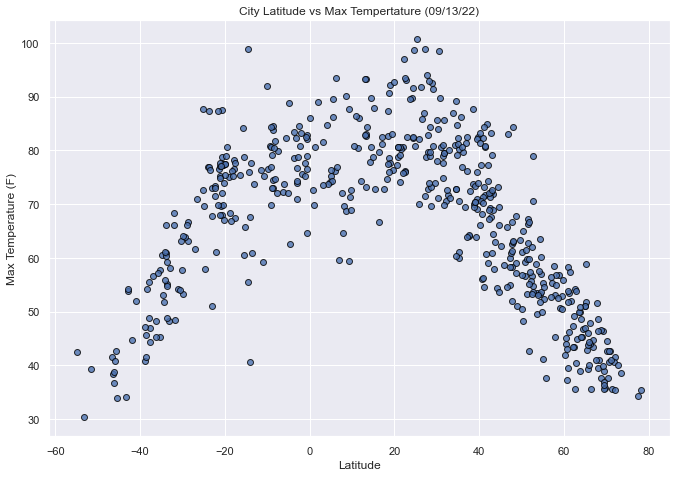

In [14]:
 # color x and y with background of white. update figure size that are based off of inches
    
f=plt.figure(facecolor=(1,1,1), figsize = (11.118, 7.65))
plt.scatter(lat, MaxTemp,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Max Tempertature (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(True)

#Save graph as a png
plt.savefig("assets/images/city_latitude_vs_temp.png")

#show plot
plt.show()

## Latitude vs. Humidity Plot

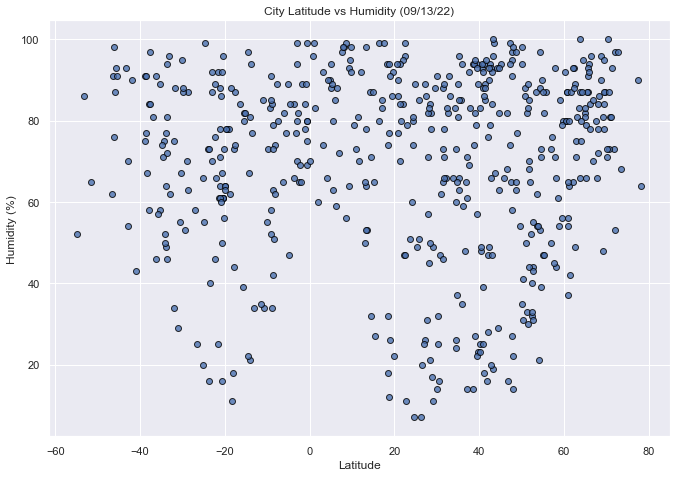

In [15]:
f=plt.figure(facecolor=(1,1,1), figsize = (11.118, 7.65))
plt.scatter(lat, Humidity,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Humidity (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)

#Save graph as a png
plt.savefig("assets/images/city_latitude_vs_humidity.png")

#show plot
plt.show()

This day it was observed that the humditity is high closer to the equatoer there does not appear to be any correction between
the latitude and the humditiy.  Looking at the latitude between -40 and 60  there are a lot of cities with humdidity near 100. 

## Latitude vs. Cloudiness Plot

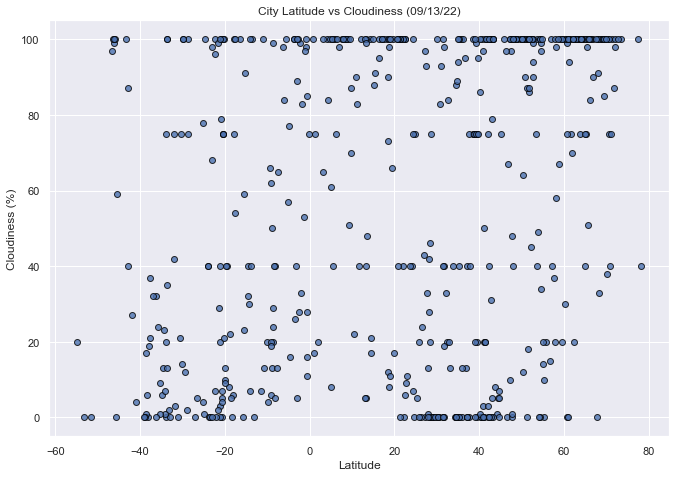

In [16]:
f=plt.figure(facecolor=(1,1,1), figsize = (11.118, 7.65))
plt.scatter(lat, Cloudiness,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Cloudiness (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

#Save graph as a png
plt.savefig("assets/images/city_latitude_vs_cloudiness.png")

#show plot
plt.show()

There is no noticable relationship between latitude and cloudiness.  The data indidcates that the cloudiness can occur 
high or low at any latitude

## Latitude vs. Wind Speed Plot

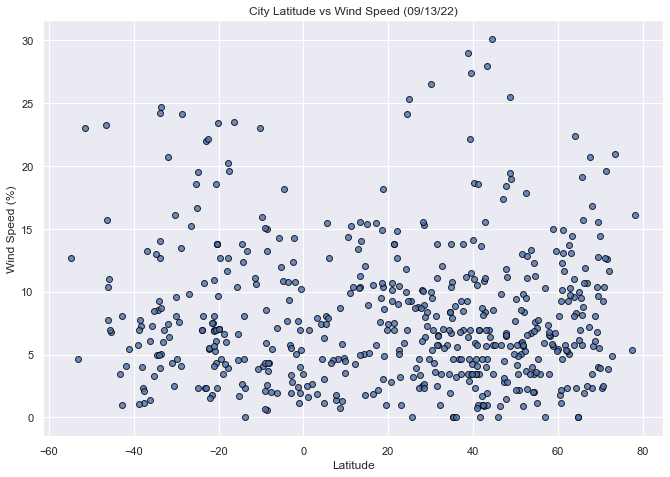

In [17]:
f=plt.figure(facecolor=(1,1,1), figsize = (11.118, 7.65))
plt.scatter(lat, WindSpeed,edgecolors="black", linewidths=1,marker="o", alpha=0.8, label = "Cities")
plt.title("City Latitude vs Wind Speed (%s)" % time.strftime("%x")) # add current data to chart
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid(True)

#Save graph as a png
plt.savefig("assets/images/city_latitude_vs_windspeed.png")

#show plot
plt.show()

## Linear Regression

In [18]:
#create a function to create linear regession plots 
def plot_linear_regression(x_values, y_values,title, text_coordinates):
    #run regression 
    (slope, intercept,rvalue, pvalues,stderr) = linregress(x_values,y_values)
    regress_values=x_values * slope + intercept
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    # plot values
    plt.scatter(x_values, y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,text_coordinates,fontsize=15,color="red")
    plt.xlabel('Latitude')
    plt.ylabel (title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [19]:
#create northern and southern Hemisphere data fromes
northernHemiDF = clean_city_data.loc[(clean_city_data["Lat"]>=0)]
southernHemiDF = clean_city_data.loc[(clean_city_data["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6708358432576019


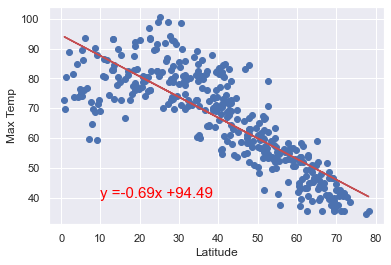

In [20]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(10,40))

The r-value of 0.53 indicates that there is a moderate correlation between max tempatures and latitude in the northern hemisphere

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.635679029342637


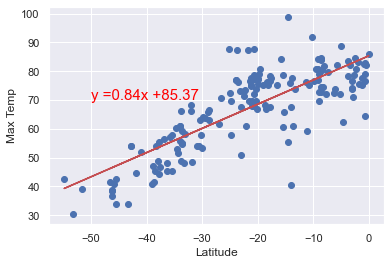

In [21]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Max Temp"]
plot_linear_regression(x_values,y_values,'Max Temp',(-50,70))

The r-value of 0.59 indicates that there is a moderate correlation between the latitude and max tempatures in the Southern Hemisphere

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.0019034741097141272


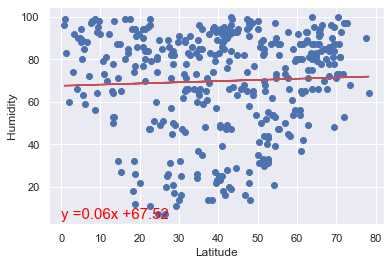

In [22]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(0,5))

The r-value of 0.0004 indicates that there no correlation between latitude and humdity in the Northern Hemisphere

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.00016650660029191047


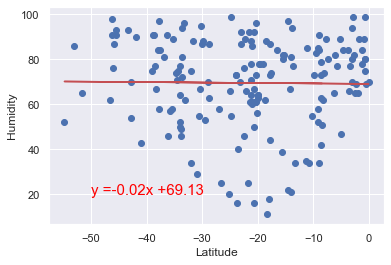

In [23]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Humidity"]
plot_linear_regression(x_values,y_values,'Humidity',(-50,20))

The r-value of 0.004 indicates there is a none or very weak between humditity and latitude in the southern hemisphere

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03056833306295688


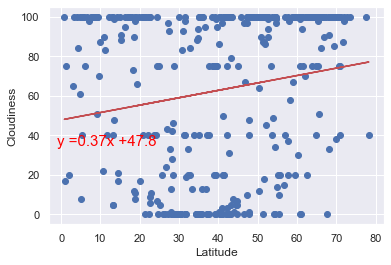

In [24]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(-1,35))

The r-value of 0.002 indicates that there is no correlation between cloudiness and latitude

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.03297648032866455


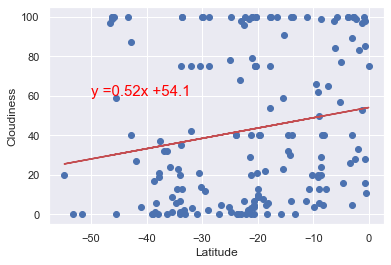

In [25]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Cloudiness"]
plot_linear_regression(x_values,y_values,'Cloudiness',(-50,60))

The r-value of 0.002 indicates that none or very weak correlation between Cloudiness and latitude

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.004201449441219266


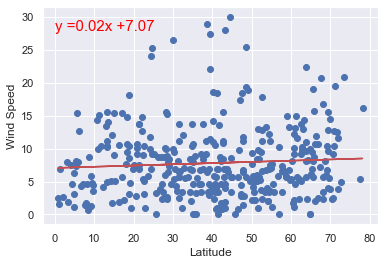

In [26]:
x_values = northernHemiDF["Lat"]
y_values = northernHemiDF["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(0,28))

The r-value of 0.22 indicates there is none or very week correlation between wind speed and latitude in the northern hemisphere

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.01139651162126261


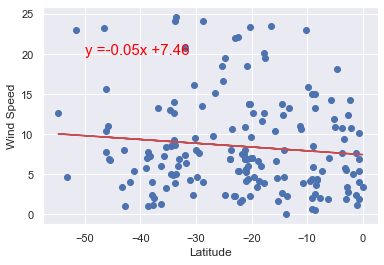

In [27]:
x_values = southernHemiDF["Lat"]
y_values = southernHemiDF["Wind Speed"]
plot_linear_regression(x_values,y_values,'Wind Speed',(-50,20))

The r-value of 0.32 indicates that there is weak correlation between wind speed and latitude in the southern hemisphere